# Global CO₂ Emissions Analysis
## Notebook 3: Emission Source Composition Analysis

Analyze the breakdown of CO₂ emissions by source (coal, oil, gas, cement, flaring, other industry) for major emitters.

Key questions:
- What are the primary emission sources for different countries?
- How does the energy mix differ between developed and developing economies?
- How has the source composition evolved over time?

Emission sources analyzed:
- **Coal**: Electricity generation, steel production
- **Oil**: Transportation, heating, petrochemicals
- **Gas**: Electricity, heating, industrial processes
- **Cement**: Construction (chemical process emissions)
- **Flaring**: Oil/gas extraction waste burning
- **Other Industry**: Various manufacturing processes

According to the previous findings of this project we'll analyze 8 major countries representing different regions and development stages:
- **China**
- **USA**
- **India**
- **Germany**
- **Brazil**
- **South Africa**
- **Saudi Arabia**
- **Australia**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 =  pd.read_csv("/content/annual-co2-emissions-per-country.csv")
df2 = pd.read_csv("/content/co-emissions-per-capita.csv")
df3 = pd.read_csv("/content/co2-by-source.csv")
df4 = pd.read_csv("/content/population.csv")
df4.columns = ["Entity", "Code", "Year", "Population"] #rename population columns for clarity

df = df1.merge(df2,on=["Entity","Code","Year"],how="outer").merge(df3,on=["Entity","Code","Year"],how="outer").merge(df4,on=["Entity","Code","Year"],how="outer")

df = df.dropna(subset="Code")
df = df[~(df["Entity"]=="World")]
df = df[df["Year"]>=1960]

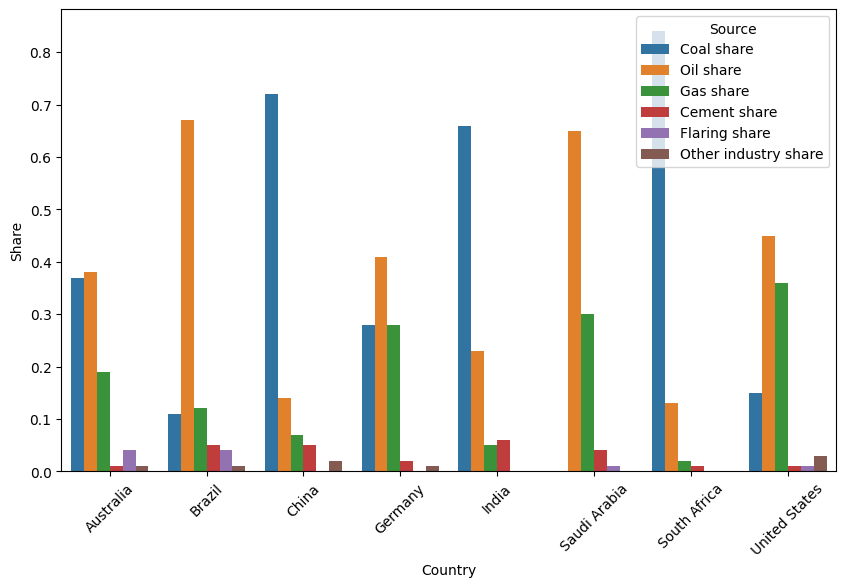

Source Composition Patterns:
Coal-dominant: ['China', 'India', 'South Africa']
Oil-dominant: ['Brazil', 'Germany', 'Saudi Arabia', 'United States']
Gas-dominant: ['United States']


,Entity,Code,Year,Annual CO₂ emissions,Annual CO₂ emissions (per capita),Annual CO₂ emissions from other industry,Annual CO₂ emissions from flaring,Annual CO₂ emissions from cement,Annual CO₂ emissions from gas,Annual CO₂ emissions from oil,Annual CO₂ emissions from coal,Population,Other industry share,Flaring share,Cement share,Gas share,Oil share,Coal share
4505,Australia,AUS,2024,3.867324e+08,14.477199,4049687.0,16258947.0,2732934.0,7.535275e+07,1.457888e+08,1.425492e+08,2.671321e+07,0.01,0.04,0.01,0.19,0.38,0.37
8688,Brazil,BRA,2024,4.830116e+08,2.278372,6392000.0,17505000.0,25381158.0,5.891424e+07,3.238647e+08,5.095448e+07,2.119986e+08,0.01,0.04,0.05,0.12,0.67,0.11
11760,China,CHN,2024,1.228904e+10,8.658390,186458990.0,4013123.0,617751900.0,8.894064e+08,1.705386e+09,8.886020e+09,1.419321e+09,0.02,0.00,0.05,0.07,0.14,0.72
21405,Germany,DEU,2024,5.723192e+08,6.768824,7110033.0,1650661.0,10282573.0,1.576788e+08,2.329577e+08,1.626394e+08,8.455223e+07,0.01,0.00,0.02,0.28,0.41,0.28
26147,India,IND,2024,3.193478e+09,2.200978,0.0,2790540.0,185969660.0,1.493522e+08,7.473328e+08,2.108033e+09,1.450936e+09,0.00,0.00,0.06,0.05,0.23,0.66
47574,Saudi Arabia,SAU,2024,6.921335e+08,20.379194,0.0,4622074.0,29380060.0,2.059694e+08,4.514613e+08,7.006450e+05,3.396275e+07,0.00,0.01,0.04,0.30,0.65,0.00
50075,South Africa,ZAF,2024,4.398305e+08,6.871580,0.0,4963.0,5634408.0,7.745587e+06,5.508739e+07,3.713581e+08,6.400719e+07,0.00,0.00,0.01,0.02,0.13,0.84
56571,United States,USA,2024,4.904120e+09,14.197287,135335890.0,61328160.0,37270656.0,1.748138e+09,2.189161e+09,7.328863e+08,3.454266e+08,0.03,0.01,0.01,0.36,0.45,0.15


In [ ]:
last = 2024
df_last = df[df["Year"]==last]
df_group = df_last[df_last["Entity"].isin(["United States","China","India","Germany","Brazil","South Africa","Saudi Arabia","Australia"])].copy()
df_group["Other industry share"] = (df_group["Annual CO₂ emissions from other industry"] / df_group["Annual CO₂ emissions"]).round(2)
df_group["Flaring share"] = (df_group["Annual CO₂ emissions from flaring"] / df_group["Annual CO₂ emissions"]).round(2)
df_group["Cement share"] = (df_group["Annual CO₂ emissions from cement"] / df_group["Annual CO₂ emissions"]).round(2)
df_group["Gas share"] = (df_group["Annual CO₂ emissions from gas"] / df_group["Annual CO₂ emissions"]).round(2)
df_group["Oil share"] = (df_group["Annual CO₂ emissions from oil"] / df_group["Annual CO₂ emissions"]).round(2)
df_group["Coal share"] = (df_group["Annual CO₂ emissions from coal"] / df_group["Annual CO₂ emissions"]).round(2)
df_group = df_group.fillna(0)

df_long = df_group.melt(id_vars="Entity",var_name="Source",value_name="Share",value_vars=["Coal share","Oil share","Gas share","Cement share","Flaring share","Other industry share"])

plt.figure(figsize=(10,6))
sns.barplot(x="Entity",y="Share",data=df_long,hue="Source",dodge=True)
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Share")
plt.show()

coal_dominant = df_group[df_group["Coal share"] > 0.5]["Entity"].tolist()
oil_dominant = df_group[df_group["Oil share"] > 0.4]["Entity"].tolist()
gas_dominant = df_group[df_group["Gas share"] > 0.3]["Entity"].tolist()

print("Source Composition Patterns:")
print("Coal-dominant:", coal_dominant)
print("Oil-dominant:", oil_dominant)
print("Gas-dominant:", gas_dominant)



## Focus on Top 3 Emitters

How has the source mix changed over time for China, USA, and India? We'll create line plots showing the evolution from 1960 to 2024.

Text(0.5, 1.02, 'Evolution of Emission Sources: USA, China, India (1960-2024)')

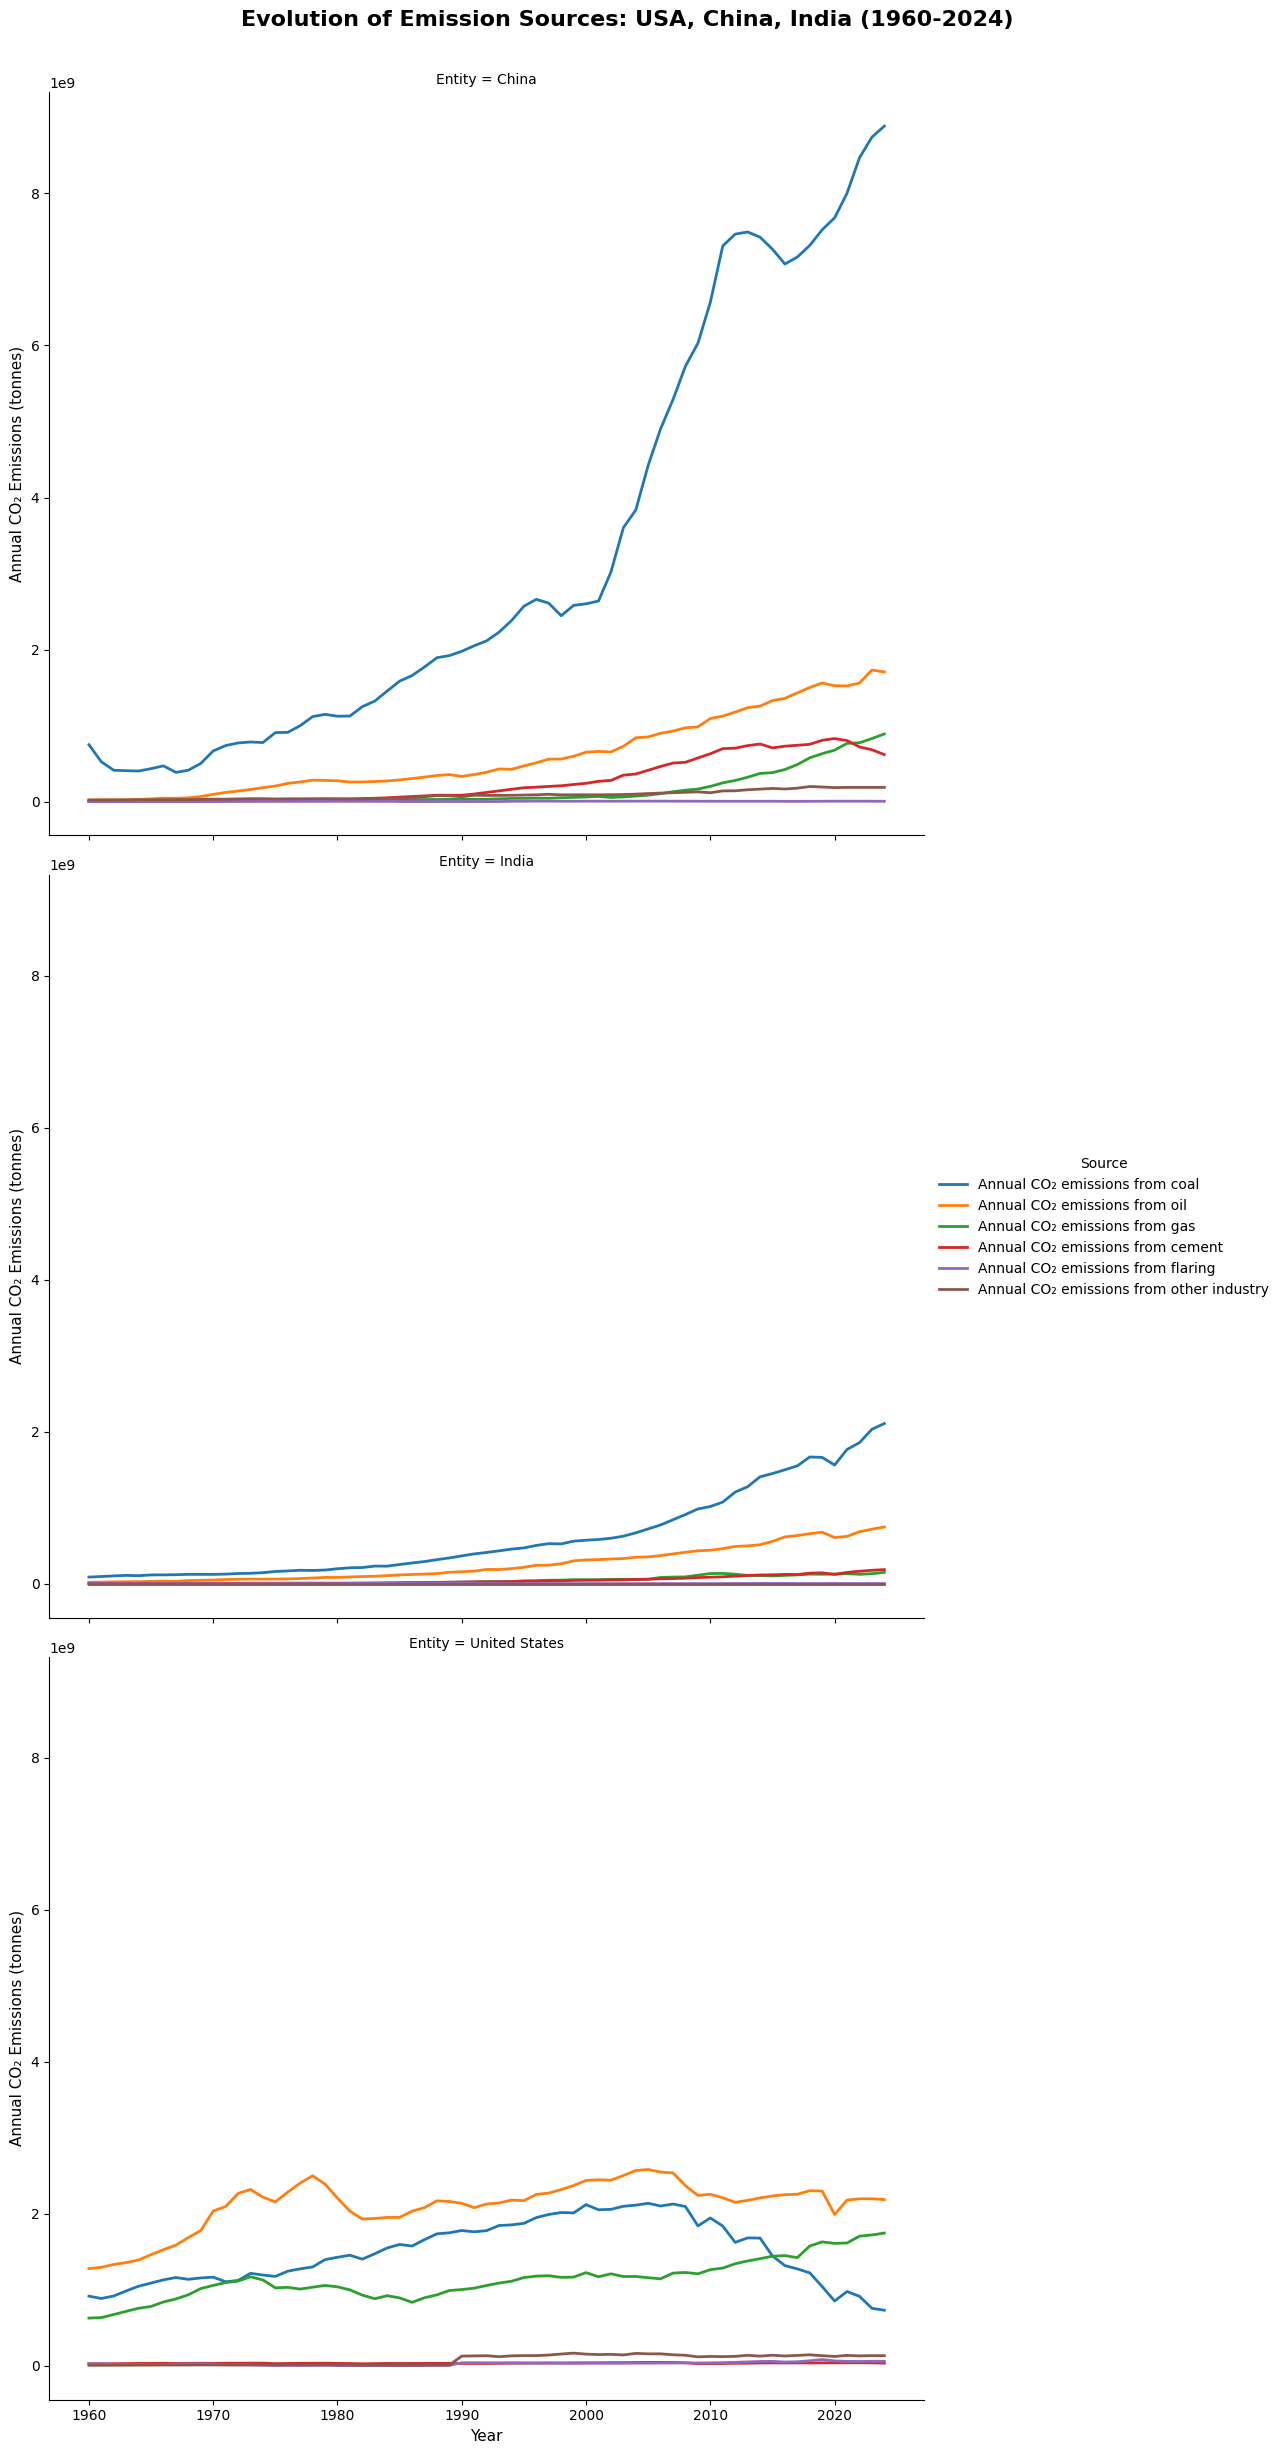

In [ ]:
focus_group = df[df["Entity"].isin(["United States","China","India"])]
focus_group = focus_group[focus_group["Year"]<=2024]
focus_group = focus_group.fillna(0)

focus_group = focus_group.melt(id_vars=["Entity","Year"],var_name="Source",value_name="Total",value_vars=["Annual CO₂ emissions from coal","Annual CO₂ emissions from oil","Annual CO₂ emissions from gas","Annual CO₂ emissions from cement","Annual CO₂ emissions from flaring","Annual CO₂ emissions from other industry"])

g = sns.relplot(x="Year",y="Total",hue="Source",data=focus_group,row="Entity",kind="line",height=8, aspect=1.2, palette="tab10",linewidth=2)
g.set_axis_labels("Year", "Annual CO₂ Emissions (tonnes)", fontsize=11)
g.fig.suptitle("Evolution of Emission Sources: USA, China, India (1960-2024)", fontsize=16, fontweight='bold', y=1.02)



In [ ]:
print("CHINA:")

china_recent = df[(df["Entity"]=="China") & (df["Year"]==2024)].iloc[0]
china_coal_share = china_recent["Annual CO₂ emissions from coal"] / china_recent["Annual CO₂ emissions"]

print(f"Coal share (2024): {china_coal_share:.1%}")
print(f"Total emissions: {china_recent['Annual CO₂ emissions']/1e9:.2f} GtCO₂")
print(f"Coal emissions: {china_recent['Annual CO₂ emissions from coal']/1e9:.2f} GtCO₂")



print("USA")

usa_recent = df[(df["Entity"]=="United States") & (df["Year"]==2024)].iloc[0]
usa_gas_share = usa_recent["Annual CO₂ emissions from gas"] / usa_recent["Annual CO₂ emissions"]
usa_coal_share = usa_recent["Annual CO₂ emissions from coal"] / usa_recent["Annual CO₂ emissions"]

print(f"Gas share (2024): {usa_gas_share:.1%}")
print(f"Coal share (2024): {usa_coal_share:.1%}")
print(f"Total emissions: {usa_recent['Annual CO₂ emissions']/1e9:.2f} GtCO₂")


print("INDIA")

india_recent = df[(df["Entity"]=="India") & (df["Year"]==2024)].iloc[0]
india_coal_share = india_recent["Annual CO₂ emissions from coal"] / india_recent["Annual CO₂ emissions"]

print(f"Coal share (2024): {india_coal_share:.1%}")
print(f"Total emissions: {india_recent['Annual CO₂ emissions']/1e9:.2f} GtCO₂")
print(f"Coal emissions: {india_recent['Annual CO₂ emissions from coal']/1e9:.2f} GtCO₂")


CHINA:
Coal share (2024): 72.3%
Total emissions: 12.29 GtCO₂
Coal emissions: 8.89 GtCO₂
USA
Gas share (2024): 35.6%
Coal share (2024): 14.9%
Total emissions: 4.90 GtCO₂
INDIA
Coal share (2024): 66.0%
Total emissions: 3.19 GtCO₂
Coal emissions: 2.11 GtCO₂


Key Findings

The source mix reveals that **there is no single decarbonization strategy**. China needs coal phase-out, Brazil needs transport electrification, USA needs both gas phase-out AND transport transformation. Any global climate deal must account for these different starting points.

### 1. Three Distinct Energy Profiles

Based on the 2024 data, we identify three clear archetypes:


- **Type A**: China, India, South Africa - coal dependent

    - **China** 72.3% coal dependency,8.89 GtCO₂ from coal alone (more than USA's total emissions!). Reasons for this exagerate data may be found in the rapid industrialization process (2000-2020) locked in coal infrastructure, the quick growth of electricity demand and the heavy industry (steel, cement, chemicals are all coal-based).
    - **India** 66.0% coal dependency, 2.11 GtCO₂ from coal alone. Coal is the cheapest way to meet energy demand that is peaking every year, India has domestic coal reserves that brings energy security.

- **Type B**: Brazil, Saudi Arabia, (possibly USA, Germany) - oil economies

    - **Brazil** 67% oil dependency** (highest in sample!), represents an outlier. Electricity is already 80% hydro (very clean!) most of the emissions come from transportation and industry (petrochemical sector). Shows that even with clean electricity, transport emissions have massive impacts.

    - **Saudi Arabia** 65% oil, 30% gas and zero coal. The fossil heavy depends on subsidiezed cheap domestic oil/gas, petrochemical industry and the lacks of energy efficiency incentives, from the chart we can also observe a Flaring significance (4%) due to wasteful extraction practices.
    
    - **USA** 46% oil (transportation), 36% gas (electricity and heating), 15% coal (still relevant but in reduction in the last 20 years)
    - **Germany** 41% oil (transport, industry), 28% coal**, 28% gas (heating). Despite energy transition, coal still high, probably because of the nuclear phase-out, and russian gas crisis (2022).

- **Type C**: USA (partially), Australia (growing) - gas transitioning
    - **USA** (covered above) gas became #1 source for electricity (40% of power generation) seen as "bridge fuel" but risk of lock-in.
    - **Australia:** 38% coal, 38% oil, 19% gas represent a balanced mix but all three are relevant, major fossil fuel exporter (LNG, coal) economic interests delay transition


### 2. Why Coal and Oil are so persistent?

Coal is cheap, reliable and enable the employement of millions (mining). Renewables, on the other hand, haven't displaced it yet beacuse of its cost (storage cost, transition upgradesa) and political weaknesses.

The Oil is mostly linked with transports, as we observe in the sample, Brazil is still heavily dependent on oil despite having implemented hydro for electricity. Oil infrastructure are deeply embedded (refineries, gas stations, vehicles) even if alternatives exist (EVs, rail, bikes) but require massive investment and behavior change

### 3. Gas as "bridge fuel"

Gas emits ca.50% less CO₂ than coal per kWh and gas plants can xount on existing pipeline infrastructure.
However there are significant issues, such as methane leaks and investment diversion. In the USA, for example, from the dataset we observe a massive coal to gas shift (2010-2020), resulting in a drop in emissions of 15%, but still 4.9 GtCO₂/year (way above 1.5°C pathway as per IPCC).

### 4. Regional Insights from Temporal Analysis

From the evolution charts (USA, China, India 1960-2024):

#### **China:**
Has China peaked? Probably yes, but plateau at very high level
- **1960-2000:** slow growth, coal always dominant
- **2000-2013:** explosive growth (10% annual) coal skyrockets
- **2013-2024:** plateau (but at 9 GtCO₂)
- **Coal trajectory:** still rising slightly despite renewable boom.


#### **USA:**
Why only 15% reduction despite coal collapse? Oil + gas compensated
- **1960-2007:** steady growth across all sources
- **2007:** peak emissions (6 GtCO₂)
- **2007-2024:** 15% decline (coal halves, gas up, oil flat)
- **Coal trajectory:** steep decline (2007-2024)


#### **India:**
When will India peak?
- **1960-1990:** very low, flat (pre-liberalization)
- **1990-2024:** steady exponential growth
- **Coal trajectory:** still rising steeply


###The pathway for 1.5°C

- **Coal must decline 90% by 2040** (mostly China + India)
- **Oil must decline 60% by 2040** (mostly USA, EU, China transport)
- **Gas must decline 50% by 2040** (USA, EU)


### Next steps

**Notebook 4** will explore what if current trends continue? What if everyone converges to different per capita targets?

**Notebook 5** will calculate how much must high-income countries reduce to meet a 2°C carbon budget?
